# Tester notebook

This notebook aims to create enviroment to simply test strategies developed in Stocks & Loss system for python

In [83]:
# imports 
from scraper import stock_daily
from analyzer import Analyzer
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt

## Settings
* Select stock ticker
* Define buy and sell strategy (buystrat and sellstrat)
* Define if you want to run stop loss and what value
* Same with profit taker

In [84]:
ticker = "SPCE"

buystrat = ["Mcstoch_ut2"]
sellstrat = ['Mcstoch']

sl = True
slval = 0.05

pt = False
ptval = 0.1

## Run calculation

In [85]:
stock = stock_daily(ticker, save=False)
trades = Analyzer(ticker=ticker, data=stock.data)

trades.strategy(buyStrategy=buystrat, sellStrategy=sellstrat,
    stopLoss=sl ,stopLossValue=slval, profitTaker=pt, profitTakerValue=ptval)

summary = trades.profit(capitalForEachTrade=200, comission=2)

profitByHolding = 100*((trades.data["Close"].iloc[-1]-trades.data["Close"].iloc[0])/trades.data["Close"].iloc[0])

In [86]:
print('Absolute profit last year:                ',np.round(summary["Profit[$]"].sum(),2),'$')
print('Relative profit last year:                ',np.round(summary["Profit[%]"].sum(),2),'%')
print('Relative profit by holding last year:     ',np.round(profitByHolding,2),'%')

Absolute profit last year:                 179.58 $
Relative profit last year:                 89.79 %
Relative profit by holding last year:      33.85 %


In [87]:
display(summary)

,Buy date,Buy price,Buy value,Position,Sell date,Sell price,Sell value,Comission,Good trade?,Profit[%],Profit[$]
0,2020-10-29,18.180000,200,11.001100,2020-10-30,17.271000,190.000000,2,0.0,-6.000000,-12.000000
1,2020-12-22,25.469999,200,7.852376,2020-12-28,24.196499,190.000000,2,0.0,-6.000000,-12.000000
2,2021-01-05,24.120001,200,8.291874,2021-02-16,50.360001,417.578763,2,1.0,107.789382,215.578763
3,2021-02-24,46.119999,200,4.336514,2021-02-25,43.813999,190.000000,2,0.0,-6.000000,-12.000000


## Visualizations

Successful trades are showcased as a light green fill, similarly, failed trades as a red fill

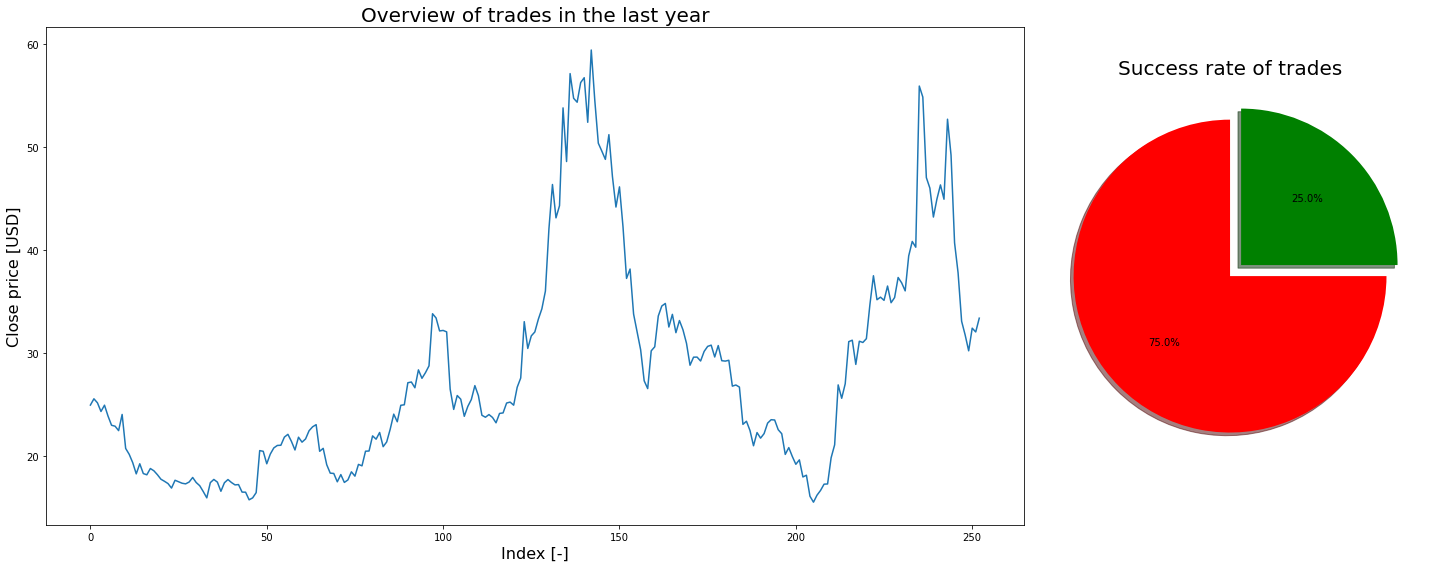

In [88]:
gtrades = summary["Good trade?"].sum()
trades = summary["Good trade?"].size

fig, ax = plt.subplots(ncols=2, figsize=(20,8), gridspec_kw={'width_ratios': [2.5, 1]})

# plot closed prices and highlighted trades
ax[0].plot(stock.data["Close"])
ax[0].set_title("Overview of trades in the last year", fontsize=20)
ax[0].set_ylabel("Close price [USD]", fontsize=16)
ax[0].set_xlabel("Index [-]", fontsize=16)

# plot piechart with percentage of succesful trades (profit / loss)
ax[1].pie([gtrades, trades-gtrades], colors=["g","r"], shadow=True, explode=(0.1, 0), autopct="%1.1f%%")
ax[1].set_title("Success rate of trades", fontsize=20)

fig.tight_layout()